wine quality prediction


used dataset WineQT.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv("WineQT.csv")

wine.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [27]:
wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
wine.groupby('quality').describe()


fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                 6.0  8.450000  2.032486  6.7  7.15  7.45   9.700  11.6   
4                33.0  7.809091  1.685668  4.6  6.70  7.60   8.500  12.5   
5               483.0  8.161077  1.557746  5.0  7.10  7.80   8.900  15.9   
6               462.0  8.317749  1.771585  5.0  7.00  7.90   9.275  14.3   
7               143.0  8.851049  2.105187  4.9  7.40  8.70  10.100  15.6   
8                16.0  8.806250  2.089168  5.0  7.35  8.85  10.400  12.6   

        volatile acidity            ...  alcohol           Id               \
                   count      mean  ...      75%   max  count         mean   
quality                             ...                                      
3                    6.0  0.897500  ...  10.1375  10.9    6.0  1121.166667   
4                   33.0  0.700000  ...  11.0000  13.1   33.0   692.848485   
5                  483.0  0.585280  ...  10.2000  14.9  483.0   753.925466   
6                  462.0  0.504957  ...  11.4000  14.0  462.0   854.625541   
7                  143.0  0.393671  ...  12.1000  14.0  143.0   830.349650   
8                   16.0  0.410000  ...  12.8250  14.0   16.0   797.875000   

                                                             
                std    min     25%     50%      75%     max  
quality                                                      
3        496.135633  459.0  712.50  1384.0  1475.75  1505.0  
4        500.723297   41.0  170.00   703.0  1189.00  1480.0  
5        484.714472    0.0  309.50   717.0  1230.00  1597.0  
6        450.794917    3.0  467.25   894.5  1246.75  1595.0  
7        403.435969    7.0  443.00   942.0  1091.00  1584.0  
8        452.120614  267.0  451.25   543.0  1140.50  1549.0  

[6 rows x 96 columns]

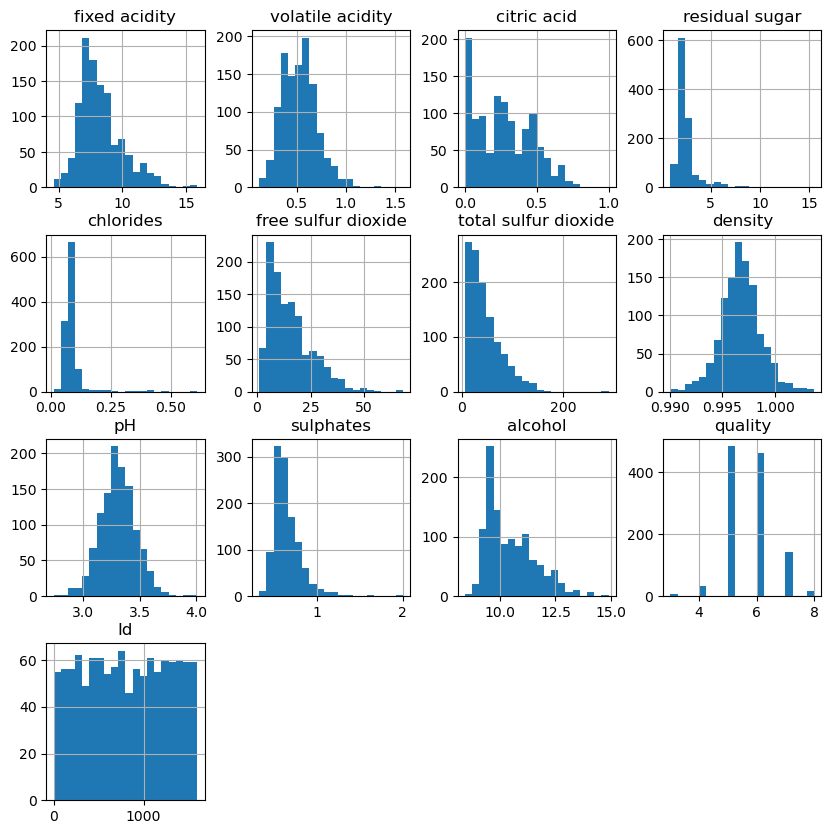

In [28]:
wine.hist(bins=20, figsize=(10, 10))
plt.show()

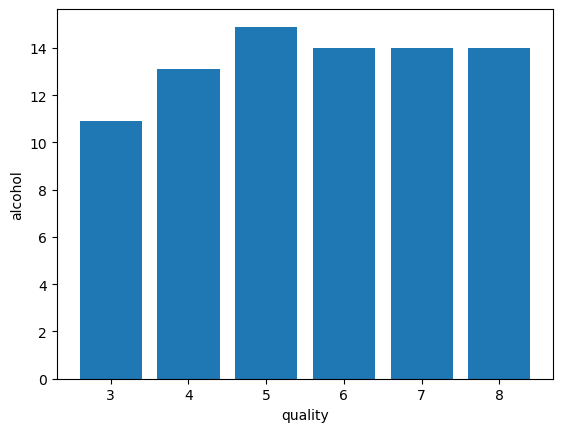

In [29]:
plt.bar(wine['quality'], wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

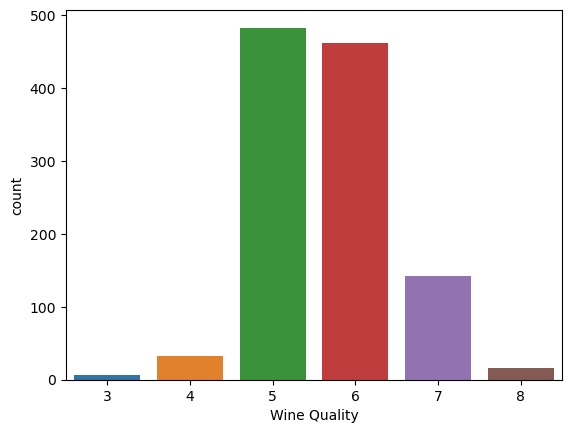

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.countplot(x="quality", data=wine)
plt.xlabel("Wine Quality")
plt.show()

In [7]:
dataset=wine.drop(['Id'],axis=1)

In [8]:
dataset.sample(5 )

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1089,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6,6
897,6.9,0.41,0.31,2.0,0.079,21.0,51.0,0.99668,3.47,0.55,9.5,6
417,12.0,0.28,0.49,1.9,0.074,10.0,21.0,0.99760,2.98,0.66,9.9,7
809,7.0,0.22,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0,6
340,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8


In [9]:
dataset['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.28, 3.58, 3.04, 3.52,
       3.17, 3.43, 3.34, 3.47, 3.38, 3.35, 3.4 , 3.42, 3.23, 3.33, 3.21,
       3.9 , 3.25, 3.15, 3.41, 3.44, 3.31, 3.54, 2.93, 3.14, 3.48, 3.75,
       3.45, 3.29, 3.08, 3.46, 3.19, 3.32, 3.07, 3.49, 3.53, 3.24, 3.63,
       3.22, 3.68, 2.74, 3.59, 3.37, 3.12, 3.57, 3.11, 3.  , 3.61, 3.06,
       3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.13, 3.02, 3.18, 3.55, 2.99,
       3.56, 3.62, 2.88, 2.95, 3.5 , 2.98, 3.03, 3.09, 2.86, 3.74, 2.92,
       3.72, 2.89, 2.94, 3.66, 3.71, 3.01, 3.78, 3.7 , 4.01, 2.9 ])

A rough range of TA and pH for reds and whites in general is:

Red wine - TA 6.0 - 7.0 g/l and pH 3.4 – 3.7
White wine - TA 6.0–9.0 g/L and pH 3.2 – 3.5

In [30]:
df = wine.drop('total sulfur dioxide', axis=1)

In [31]:
len(df)

1143

In [32]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [34]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [35]:
features = df.drop(['quality', 'best quality'], axis=1)


In [36]:
target = df['best quality']
 


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=10)

In [67]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
xtrain = norm.fit_transform(x_train)
xtest = norm.transform(x_test)

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [69]:
model.fit(xtrain,y_train)

LinearRegression()

In [70]:
model.score(xtest,y_test)

0.3357808822903997

In [71]:
y_pred=model.predict(xtest)

In [72]:
from sklearn.metrics import classification_report ,confusion_matrix

In [73]:
y_pred=[1 if x>0.5 else 0 for x in y_pred ]


In [74]:
y_pred

[0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0]

In [75]:
y_test 

67      0
225     0
1121    1
74      0
43      0
       ..
501     0
31      0
873     1
1083    1
518     0
Name: best quality, Length: 229, dtype: int64

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       104
           1       0.79      0.74      0.77       125

    accuracy                           0.75       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.75      0.75      0.75       229



In [78]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[79, 25],
       [32, 93]], dtype=int64)

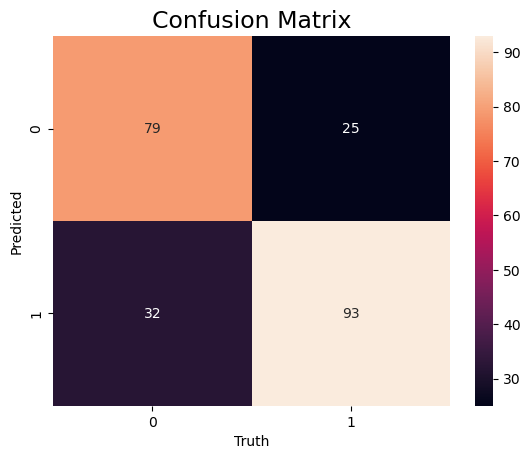

In [79]:
import seaborn as sb
sb.heatmap(cm,annot=True)
plt.ylabel('Predicted')
plt.xlabel('Truth')
plt.title('Confusion Matrix',fontsize=17)
plt.show()